In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive  # Used to import Google Drive functionality in Colab
drive.mount('/content/drive')  # Mounts Google Drive to access files

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Anukul_ ES PML 2405/Home Work/Datasets/Titanic-Dataset.csv')


In [4]:
data.shape

(891, 12)

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


  Survived → Survival Status

  Pclass → Passenger Class

  Sex → Gender

  Age → Age

  SibSp → Siblings and Spouses Aboard

  Parch → Parents and Children Aboard

  Fare → Ticket Fare

  Embarked → Port of Embarkation

  Name → Passenger Name

  Ticket → Ticket Number

  Cabin → Cabin Number



In [6]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [7]:
data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


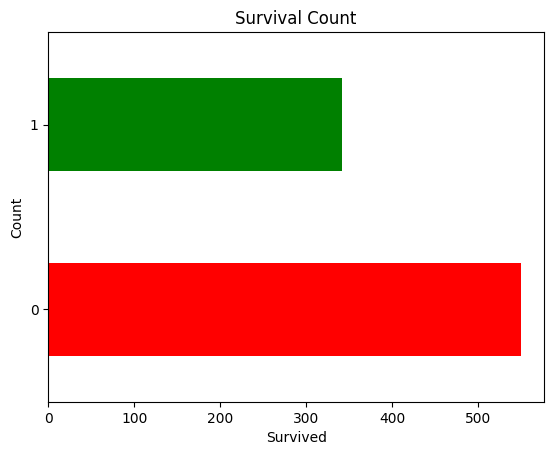

In [8]:
data['Survived'].value_counts().plot(kind='barh', color=['red', 'green'])
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [9]:
# data['Sex']=data['Sex'].replace({'male': 1, 'female': 0})

In [10]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le= LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])


In [13]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [14]:
new_order = ['Age', 'Sex','Pclass', 'Parch', 'Fare',  'SibSp', 'Embarked', 'Survived']

In [15]:
data = data[new_order]

In [16]:
data.head()

,Age,Sex,Pclass,Parch,Fare,SibSp,Embarked,Survived
0,22.0,1,3,0,7.2500,1,2,0
1,38.0,0,1,0,71.2833,1,0,1
2,26.0,0,3,0,7.9250,0,2,1
3,35.0,0,1,0,53.1000,1,2,1
4,35.0,1,3,0,8.0500,0,2,0


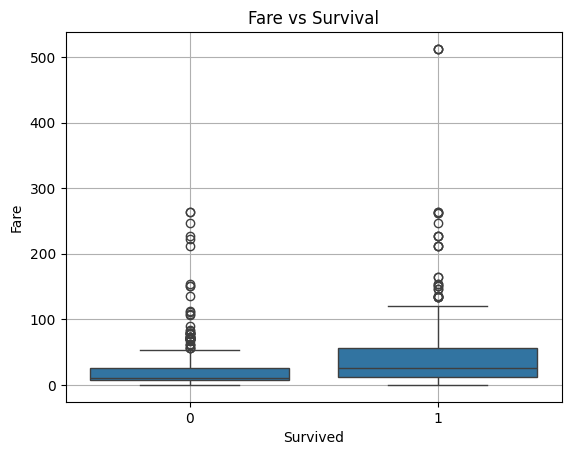

In [17]:

# Histogram of Fare vs Survived
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title("Fare vs Survival")
plt.grid(True)
plt.show()


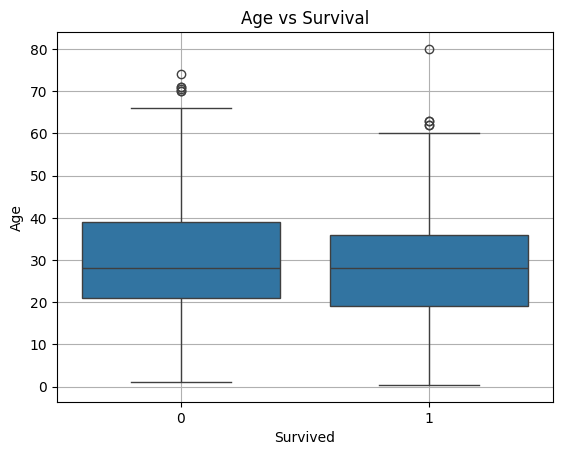

In [18]:

sns.boxplot(x='Survived', y='Age', data=data)
plt.title("Age vs Survival")
plt.grid(True)
plt.show()


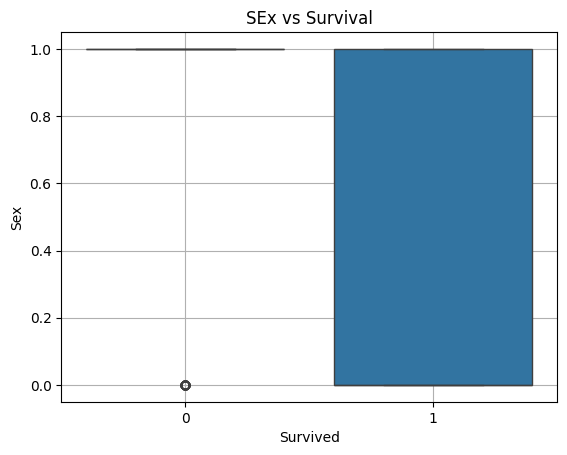

In [19]:

sns.boxplot(x='Survived', y='Sex', data=data)
plt.title("SEx vs Survival")
plt.grid(True)
plt.show()


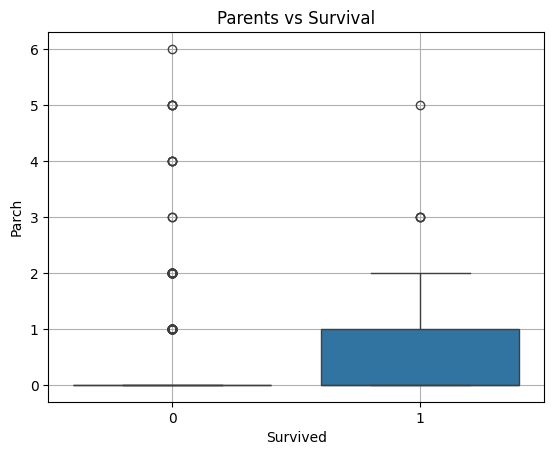

In [20]:

sns.boxplot(x='Survived', y='Parch', data=data)
plt.title("Parents vs Survival")
plt.grid(True)
plt.show()


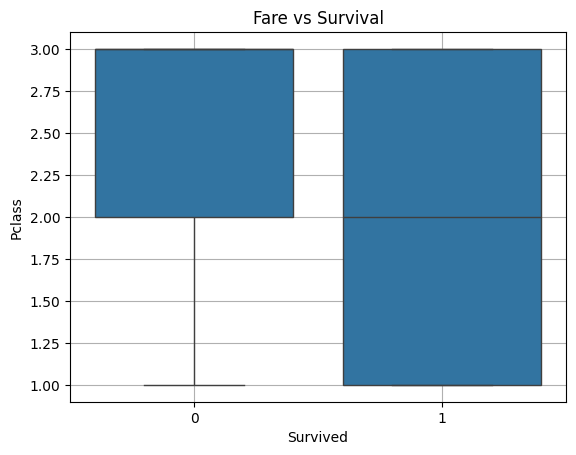

In [21]:

sns.boxplot(x='Survived', y='Pclass', data=data)
plt.title("Fare vs Survival")
plt.grid(True)
plt.show()


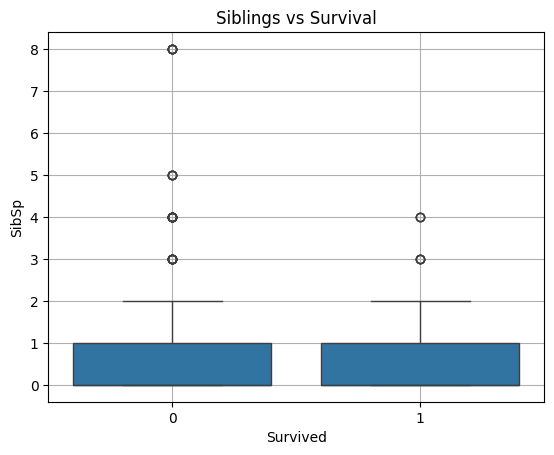

In [22]:
sns.boxplot(x='Survived', y='SibSp', data=data)
plt.title("Siblings vs Survival")
plt.grid(True)
plt.show()


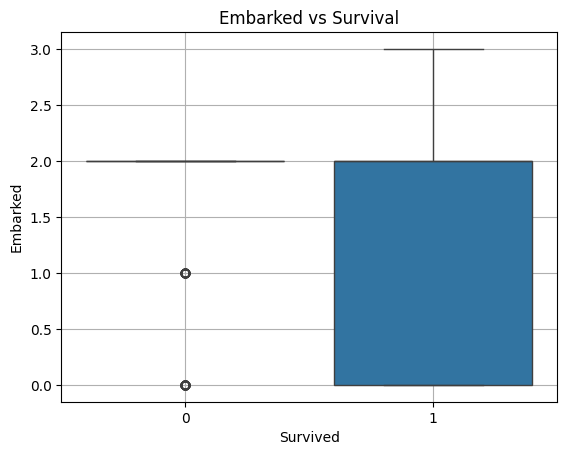

In [23]:
sns.boxplot(x='Survived', y='Embarked', data=data)
plt.title("Embarked vs Survival")
plt.grid(True)
plt.show()


In [24]:
data.isnull().sum()

,0
Age,177
Sex,0
Pclass,0
Parch,0
Fare,0
SibSp,0
Embarked,0
Survived,0


In [25]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [26]:
data.isnull().sum()

,0
Age,0
Sex,0
Pclass,0
Parch,0
Fare,0
SibSp,0
Embarked,0
Survived,0


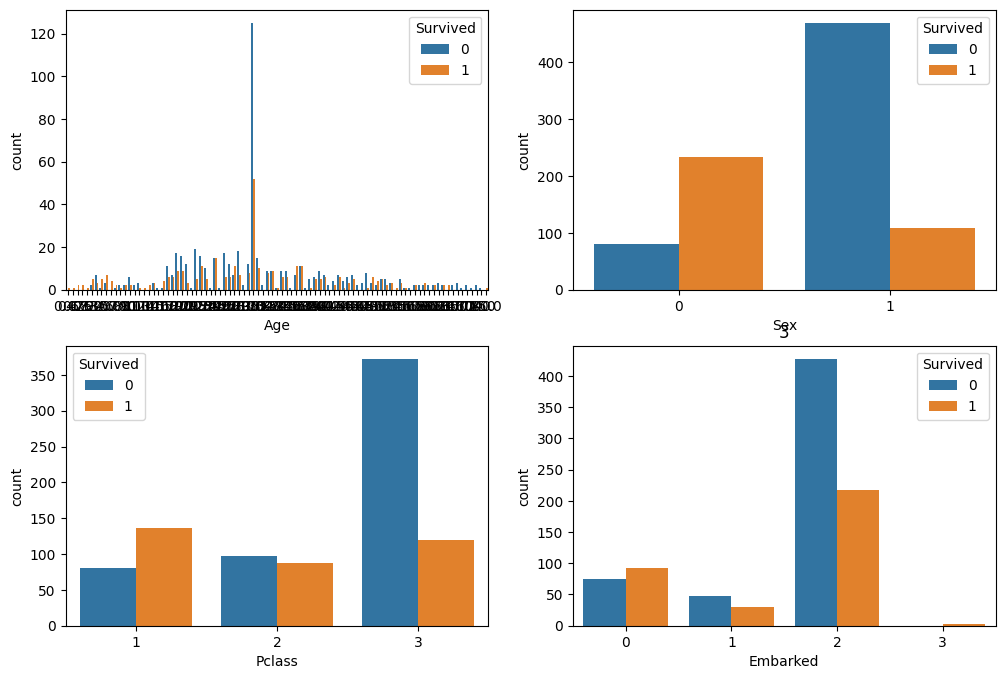

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Age', 'Sex','Pclass', 'Embarked']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs = axs.ravel()

for i, col in enumerate(columns):
    sns.countplot(data=data, x=col, ax=axs[i],hue='Survived')
    plt.title(i)

plt.show()

In [28]:
x = data.drop(['Survived'],axis=1)
y = data['Survived']

In [29]:
x

,Age,Sex,Pclass,Parch,Fare,SibSp,Embarked
0,22.000000,1,3,0,7.2500,1,2
1,38.000000,0,1,0,71.2833,1,0
2,26.000000,0,3,0,7.9250,0,2
3,35.000000,0,1,0,53.1000,1,2
4,35.000000,1,3,0,8.0500,0,2
...,...,...,...,...,...,...,...
886,27.000000,1,2,0,13.0000,0,2
887,19.000000,0,1,0,30.0000,0,2
888,29.699118,0,3,2,23.4500,1,2
889,26.000000,1,1,0,30.0000,0,0


In [30]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [32]:
x_train.shape

(623, 7)

#  Standard scaler


**Scaling** mane feature gulo ke same level e ana — jate KNN (or any distance-based model) sob gulo ke fair bhabe judge korte pare.

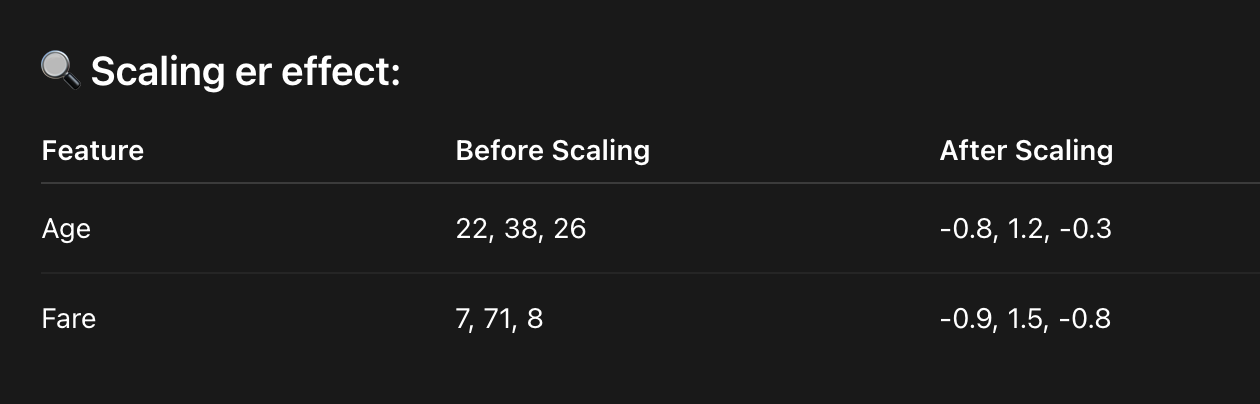

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
x_train_scaled.shape

(623, 7)

In [35]:
x_test_scaled.shape

(268, 7)

In [36]:
print(f'Before smote training, Survive : {list(y_train).count(1)} ,negative : {list(y_train).count(0)}')


Before smote training, Survive : 242 ,negative : 381


In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_new,y_train_new = smote.fit_resample(x_train_scaled,y_train)



In [38]:
print(f'After smote traning, positive : {list(y_train_new).count(1)} ,negative : {list(y_train_new).count(0)}')


After smote traning, positive : 381 ,negative : 381


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [40]:
neigh=KNeighborsClassifier()

In [41]:

for i in range(10,30,2):

    print('K',i)

    # initialization
    neigh = KNeighborsClassifier(n_neighbors=i)

  # Training
    neigh.fit(x_train_new, y_train_new)

    # Test the training data
    y_pred_train = neigh.predict(x_train_new)
    accuracy_train = accuracy_score(y_pred_train,y_train_new)
    f1_train = f1_score(y_pred_train,y_train_new)

    # Test the test data
    y_pred_test = neigh.predict(x_test_scaled)
    accuracy_test = accuracy_score(y_pred_test,y_test)
    f1_test = f1_score(y_pred_test,y_test)

    print(accuracy_train,accuracy_test)
    print(f1_train,f1_test)
    print()

K 10
0.8320209973753281 0.7947761194029851
0.8236914600550964 0.729064039408867

K 12
0.8228346456692913 0.7947761194029851
0.8137931034482758 0.7263681592039801

K 14
0.8202099737532809 0.8022388059701493
0.8094575799721836 0.7309644670050761

K 16
0.8070866141732284 0.8134328358208955
0.7966804979253111 0.75

K 18
0.8031496062992126 0.7947761194029851
0.7922437673130194 0.729064039408867

K 20
0.800524934383202 0.8097014925373134
0.7934782608695652 0.751219512195122

K 22
0.7952755905511811 0.8208955223880597
0.7914438502673797 0.7714285714285715

K 24
0.8018372703412073 0.8097014925373134
0.7945578231292517 0.7559808612440191

K 26
0.8031496062992126 0.8134328358208955
0.7961956521739131 0.7619047619047619

K 28
0.8018372703412073 0.8097014925373134
0.7917241379310345 0.7627906976744186



In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:

parameters = {'n_neighbors':list(range(10,35,2))}
neigh = KNeighborsClassifier()

Gsv = GridSearchCV(neigh, parameters)
Gsv.fit(x_train_new, y_train_new)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28,
                                         30, 32, 34]})

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': list(range(10, 30, 2))}
neigh = KNeighborsClassifier()

# GridSearchCV object
Gsv = GridSearchCV(neigh, parameters)

# IMPORTANT: fit on training data
Gsv.fit(x_train_new, y_train_new)

# Now you can get the best parameters
print("Best K:", Gsv.best_params_)
print("Best Score:", Gsv.best_score_)


Best K: {'n_neighbors': 20}
Best Score: 0.7900756793945648


In [45]:
neigh.fit(x_train_new, y_train_new)  # 👈 Important step

y_pred_train = neigh.predict(x_train_new)
f1_train = f1_score(y_train_new, y_pred_train)
print("F1 Score (Train):", f1_train)

print(classification_report(y_train_new, y_pred_train, target_names=['Not Survived', 'Survived']))


F1 Score (Train): 0.8683181225554107
              precision    recall  f1-score   support

Not Survived       0.87      0.86      0.87       381
    Survived       0.86      0.87      0.87       381

    accuracy                           0.87       762
   macro avg       0.87      0.87      0.87       762
weighted avg       0.87      0.87      0.87       762



[[328  48]
 [ 53 333]]


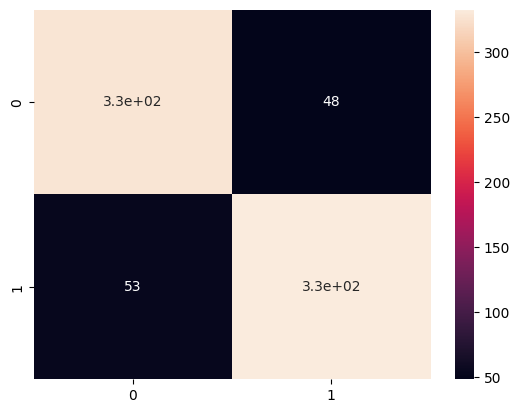

In [46]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_pred_train, y_train_new)
import seaborn as sns
sns.heatmap(c, annot=True)
print(c)

In [47]:
y_pred_test = neigh.predict(x_test_scaled)
f1_test = f1_score(y_pred_test,y_test)
print(f1_test)
print(classification_report(y_pred_test, y_test, target_names=['Not Survived','Survived']))

0.6822429906542056
              precision    recall  f1-score   support

Not Survived       0.76      0.82      0.79       154
    Survived       0.73      0.64      0.68       114

    accuracy                           0.75       268
   macro avg       0.74      0.73      0.74       268
weighted avg       0.74      0.75      0.74       268



array([[127,  27],
       [ 41,  73]])

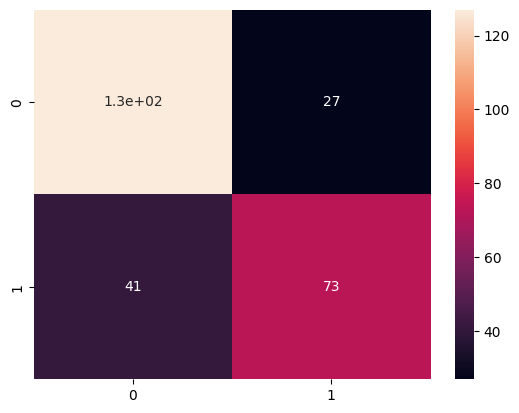

In [48]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_pred_test, y_test)
import seaborn as sns
sns.heatmap(c, annot=True)
c

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize GaussianNB
gnb = GaussianNB()

# Fit the model on scaled + SMOTEd train data
gnb.fit(x_train_new, y_train_new)

# Predict on training and test data
y_pred_train = gnb.predict(x_train_new)
y_pred_test = gnb.predict(x_test_scaled)

# Accuracy results
print("Train accuracy:", round(accuracy_score(y_train_new, y_pred_train), 3))
print("Test accuracy:", round(accuracy_score(y_test, y_pred_test), 3))


Train accuracy: 0.777
Test accuracy: 0.78


In [50]:
from sklearn.metrics import f1_score, classification_report

gnb.fit(x_train_new, y_train_new)

y_pred_test = neigh.predict(x_test_scaled)
f1_test = f1_score(y_pred_test,y_test)
print(f1_test)
print(classification_report(y_pred_test, y_test, target_names=['Survived','Not survived']))

0.6822429906542056
              precision    recall  f1-score   support

    Survived       0.76      0.82      0.79       154
Not survived       0.73      0.64      0.68       114

    accuracy                           0.75       268
   macro avg       0.74      0.73      0.74       268
weighted avg       0.74      0.75      0.74       268



In [51]:
from sklearn.metrics import precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)

print(f'Precision: {precision:.2f}')



recall = recall_score(y_test, y_pred_test, average='weighted', zero_division=1)

print(f'Recall: {recall:.2f}')

f1 = f1_score(y_test, y_pred_test, average='weighted', zero_division=1)

print(f'F1 Score: {f1:.2f}')



Accuracy: 0.75
Precision: 0.76
Recall: 0.75
F1 Score: 0.75


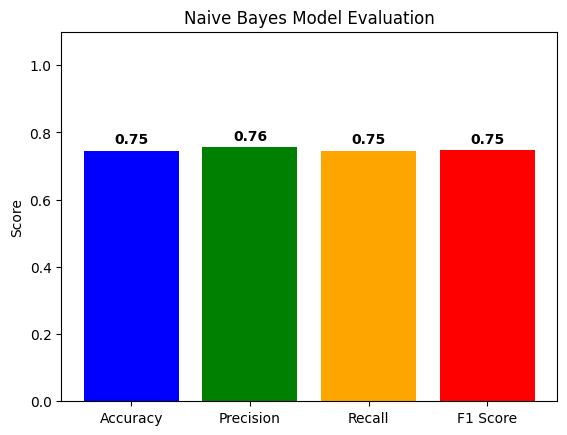

In [52]:
import matplotlib.pyplot as plt

# Store the metrics in a dictionary
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Plot the bar chart
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red'])

# Add labels above each bar
for i, (metric, score) in enumerate(metrics.items()):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', fontsize=10, fontweight='bold')

plt.ylabel('Score')
plt.title('Naive Bayes Model Evaluation')
plt.ylim(0, 1.1)  # Add a little extra space for the labels
plt.show()


# **Logistic Regression**

In [53]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(penalty='l2',C=10,class_weight='balanced',random_state=1,solver='lbfgs',n_jobs=-1)


lgr.fit(x_train_new, y_train_new)

LogisticRegression(C=10, class_weight='balanced', n_jobs=-1, random_state=1)

| Parameter Name            | Ki Kaj Kore                                      | Kakhon Use Korte Hoy                                        |
| ------------------------- | ------------------------------------------------------------ | ----------------------------------------------------------------------------- |
| `penalty='l2'`            | Weight gula ke chhoto rakhe — overfitting komai.             | Default safe choice. Jodi model complex hoye jacchilo, eta use koro.          |
| `C=10`                    | Regularization komaye — model ke beshi flexible kore dey.    | Jodi model underfit kortesilo, ba beshi strict lagtesilo, taile barai.        |
| `class_weight='balanced'` | Minority class ke beshi importance dey.                      | Jodi dataset imbalanced (e.g., survived=1 onek kom) — but SMOTE use korle na. |
| `random_state=1`          | Randomness fix kore — bar bar same result ashe.              | Reproducibility dorkar hole always use koro.                                  |
| `solver='lbfgs'`          | Optimization method — fast, stable, multiclass support kore. | Small-medium dataset e default safe choice.                                   |
| `n_jobs=-1`               | All CPU core use kore training time komay.                   | Speed chai jodi — multi-core system e always use koro.                        |


In [54]:
# Test the training data


y_pred_train = lgr.predict(x_train_new)
accuracy_train = accuracy_score(y_pred_train,y_train_new)

f1_train = f1_score(y_pred_train,y_train_new)

# Test the test data

y_pred_test = lgr.predict(x_test_scaled)
accuracy_test = accuracy_score(y_pred_test,y_test)
f1_test = f1_score(y_pred_test,y_test)
print("    Traning                       Test ")
print("Accuracy :", accuracy_train , accuracy_test)
print("f1 Score :",f1_train,f1_test)
print()

    Traning                       Test 
Accuracy : 0.7847769028871391 0.8022388059701493
f1 Score : 0.7771739130434783 0.7464114832535885



In [55]:
lgr.fit(x_train_new, y_train_new)  # 👈 Important step

y_pred_train = lgr.predict(x_train_new)
f1_train = f1_score(y_train_new, y_pred_train)
print("F1 Score (Train):", f1_train)

print(classification_report(y_train_new, y_pred_train, target_names=['Not Survived', 'Survived']))


F1 Score (Train): 0.7771739130434783
              precision    recall  f1-score   support

Not Survived       0.77      0.82      0.79       381
    Survived       0.81      0.75      0.78       381

    accuracy                           0.78       762
   macro avg       0.79      0.78      0.78       762
weighted avg       0.79      0.78      0.78       762



In [56]:
y_pred_test = lgr.predict(x_test_scaled)
f1_test = f1_score(y_pred_test,y_test)
print("f1 Score(test) ",f1_test)
print(classification_report(y_pred_test, y_test, target_names=['Not Survived','Survived']))

f1 Score(test)  0.7464114832535885
              precision    recall  f1-score   support

Not Survived       0.82      0.86      0.84       159
    Survived       0.78      0.72      0.75       109

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



| Parameter                 | Real-world Example                                                         |
| ------------------------- | -------------------------------------------------------------------------- |
| `penalty='l2'`            | Feature gulo ke bolse: “Too aggressive hoiyo na.”                          |
| `C=10`                    | "Tui decision nite free. Ami boro penalty dibo na."                        |
| `class_weight='balanced'` | “Boro class kom value pabe, chhoto class beshi — jate fair decision ashe.” |
| `random_state=1`          | "Protibar same exam paper dewa."                                           |
| `solver='lbfgs'`          | "Shobcheye smart optimizer use korsi."                                     |
| `n_jobs=-1`               | "Sob CPU core use kor. Fast result chai."                                  |


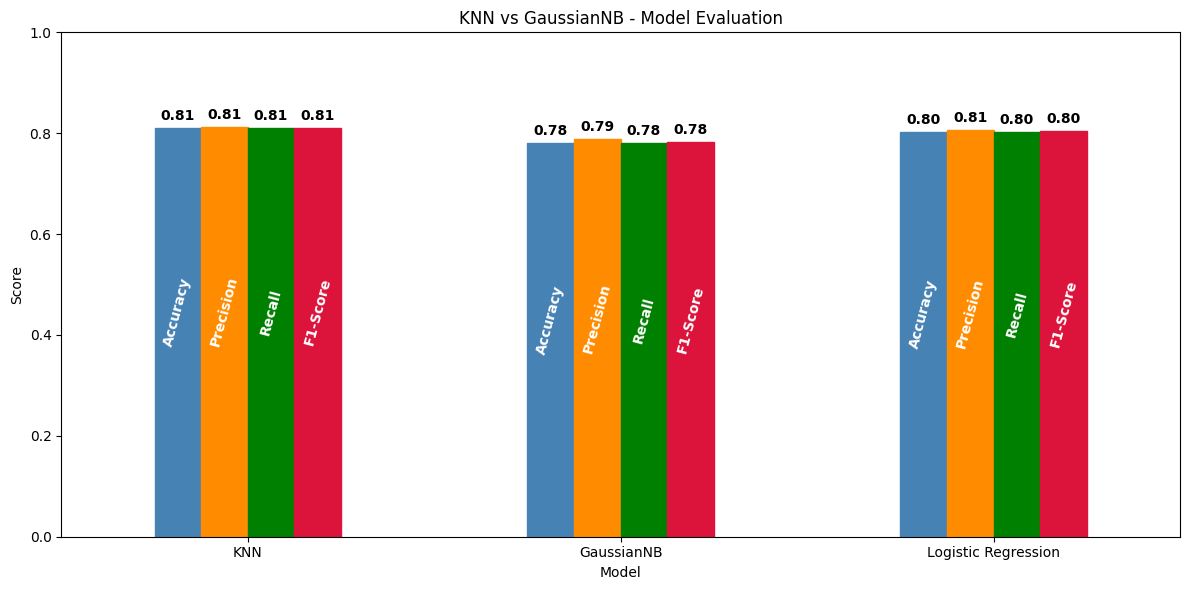

In [57]:

from sklearn.neighbors import KNeighborsClassifier


# Define models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=20),
    'GaussianNB': GaussianNB(),
    'Logistic Regression': LogisticRegression(penalty='l2',C=10,random_state=1,solver='lbfgs',n_jobs=-1)

}




results = []
for name, model in models.items():
    model.fit(x_train_new, y_train_new)
    y_pred = model.predict(x_test_scaled)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=1),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=1),
        'F1-Score': f1_score(y_test, y_pred, average='weighted', zero_division=1)
    })

# Convert to DataFrame
df_results = pd.DataFrame(results).set_index('Model')

# Plotting
ax = df_results.plot(kind='bar', figsize=(12, 6), legend=False)
plt.title("KNN vs GaussianNB - Model Evaluation")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)

# Bar color mapping to metric names
colors = {
    'Accuracy': 'steelblue',
    'Precision': 'darkorange',
    'Recall': 'green',
    'F1-Score': 'crimson'
}

for bars, metric_name in zip(ax.containers, df_results.columns):
    for bar in bars:
        height = bar.get_height()
        # Value on top
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
        # Vertical metric name inside the bar
        ax.text(bar.get_x() + bar.get_width() / 2, height * 0.55, metric_name,
                ha='center', va='center', color='white', fontsize=10, fontweight='bold', rotation=75)
        # Bar color
        bar.set_color(colors[metric_name])

plt.tight_layout()
plt.show()


In [58]:
from prettytable import PrettyTable

# Create PrettyTable
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]

# Add rows from df_results
for model_name, row in df_results.iterrows():
    accuracy = round(row['Accuracy'], 2)
    precision = round(row['Precision'], 2)
    recall = round(row['Recall'], 2)
    f1 = round(row['F1-Score'], 2)

    table.add_row([model_name, accuracy, precision, recall, f1])

print(table)


+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1-Score |
+---------------------+----------+-----------+--------+----------+
|         KNN         |   0.81   |    0.81   |  0.81  |   0.81   |
|      GaussianNB     |   0.78   |    0.79   |  0.78  |   0.78   |
| Logistic Regression |   0.8    |    0.81   |  0.8   |   0.8    |
+---------------------+----------+-----------+--------+----------+


In [59]:
# save the model
import pickle
filename ='final_model.pkl'
pickle.dump(lgr,open(filename,'wb')) # wb = write binary



In [60]:
x_test.head()

,Age,Sex,Pclass,Parch,Fare,SibSp,Embarked
495,29.699118,1,3,0,14.4583,0,0
648,29.699118,1,3,0,7.5500,0,2
278,7.000000,1,3,1,29.1250,4,1
31,29.699118,0,1,0,146.5208,1,0
255,29.000000,0,3,2,15.2458,0,0


In [61]:
data['Survived']=data['Survived'].replace({0:'Not Survived',1:'Survived'})

In [62]:
data['Survived']

,Survived
0,Not Survived
1,Survived
2,Survived
3,Survived
4,Not Survived
...,...
886,Not Survived
887,Survived
888,Not Survived
889,Survived


In [63]:
data.iloc[495:497]

,Age,Sex,Pclass,Parch,Fare,SibSp,Embarked,Survived
495,29.699118,1,3,0,14.4583,0,0,Not Survived
496,54.000000,0,1,0,78.2667,1,0,Survived


In [64]:
# load model

load_model = pickle.load(open(filename,'rb'))# read binary

result = load_model.predict([[29.699118,1,3,0,14.4583,0,0]])


if result ==1:
    print('Survived')
else:
    print('Not Survived')

Not Survived
